In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest
from scipy.linalg import svd

In [3]:
data=pd.read_csv('diamonds (2).csv', sep=',')

In [4]:
#data quality
data['carat'] = pd.to_numeric(data['carat'], errors='coerce')
data['depth'] = pd.to_numeric(data['depth'], errors='coerce')
data['table'] = pd.to_numeric(data['table'], errors='coerce')
data['x'] = pd.to_numeric(data['x'], errors='coerce')
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data['z'] = pd.to_numeric(data['z'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

for col in ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']:
    if data[data[col] < 0].shape[0] > 0:
        print(f"Corrupted data in {col}: ", data[data[col] < 0].shape[0])

for col in ['carat', 'x', 'y', 'z']:
    if data[data[col] == 0].shape[0] > 0:
        print(f"Corrupted data in {col}: ", data[data[col] == 0].shape[0])

expected_cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
expected_colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
expected_clarity = ['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']

if not set(data['cut']).issubset(expected_cuts):
    print("Unexpected values in 'cut'")
if not set(data['color']).issubset(expected_colors):
    print("Unexpected values in 'color'")
if not set(data['clarity']).issubset(expected_clarity):
    print("Unexpected values in 'clarity'")

Corrupted data in x:  8
Corrupted data in y:  7
Corrupted data in z:  20


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


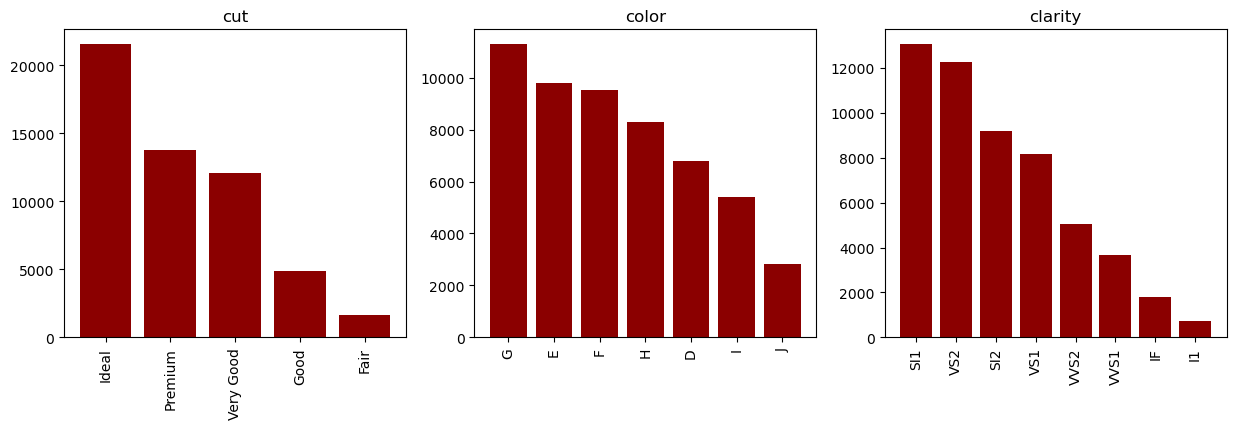

In [5]:
#summary statistics
print(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].describe())

#bar charts for non-numerical attributes
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cut_counts = data['cut'].value_counts()
axs[0].bar(x=range(len(cut_counts)), height=cut_counts, color='darkred')
axs[0].set_title('cut')
axs[0].set_xticks(range(len(cut_counts)))  # Set the tick positions
axs[0].set_xticklabels(cut_counts.index, rotation=90)  # Set the tick labels with rotation
color_counts = data['color'].value_counts()
axs[1].bar(x=range(len(color_counts)), height=color_counts, color='darkred')
axs[1].set_title('color')
axs[1].set_xticks(range(len(color_counts)))  # Set the tick positions
axs[1].set_xticklabels(color_counts.index, rotation=90)  # Set the tick labels with rotation
clarity_counts = data['clarity'].value_counts()
axs[2].bar(x=range(len(clarity_counts)), height=clarity_counts, color='darkred')
axs[2].set_title('clarity')
axs[2].set_xticks(range(len(clarity_counts)))  # Set the tick positions
axs[2].set_xticklabels(clarity_counts.index, rotation=90)  # Set the tick labels with rotation
plt.savefig('categorical.png')
plt.show()

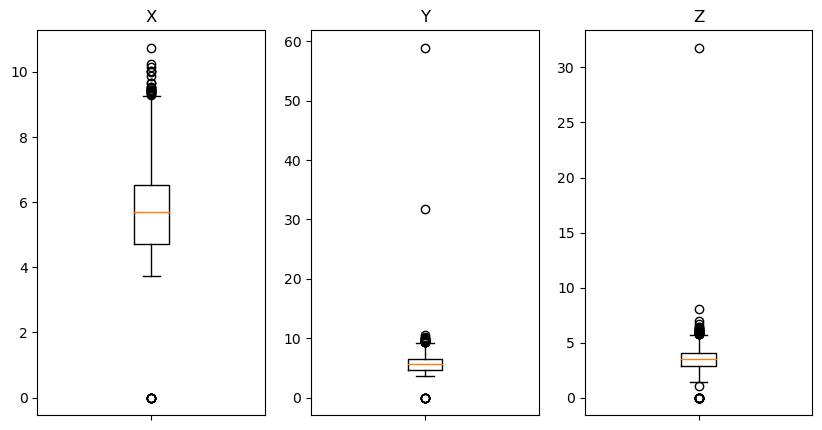

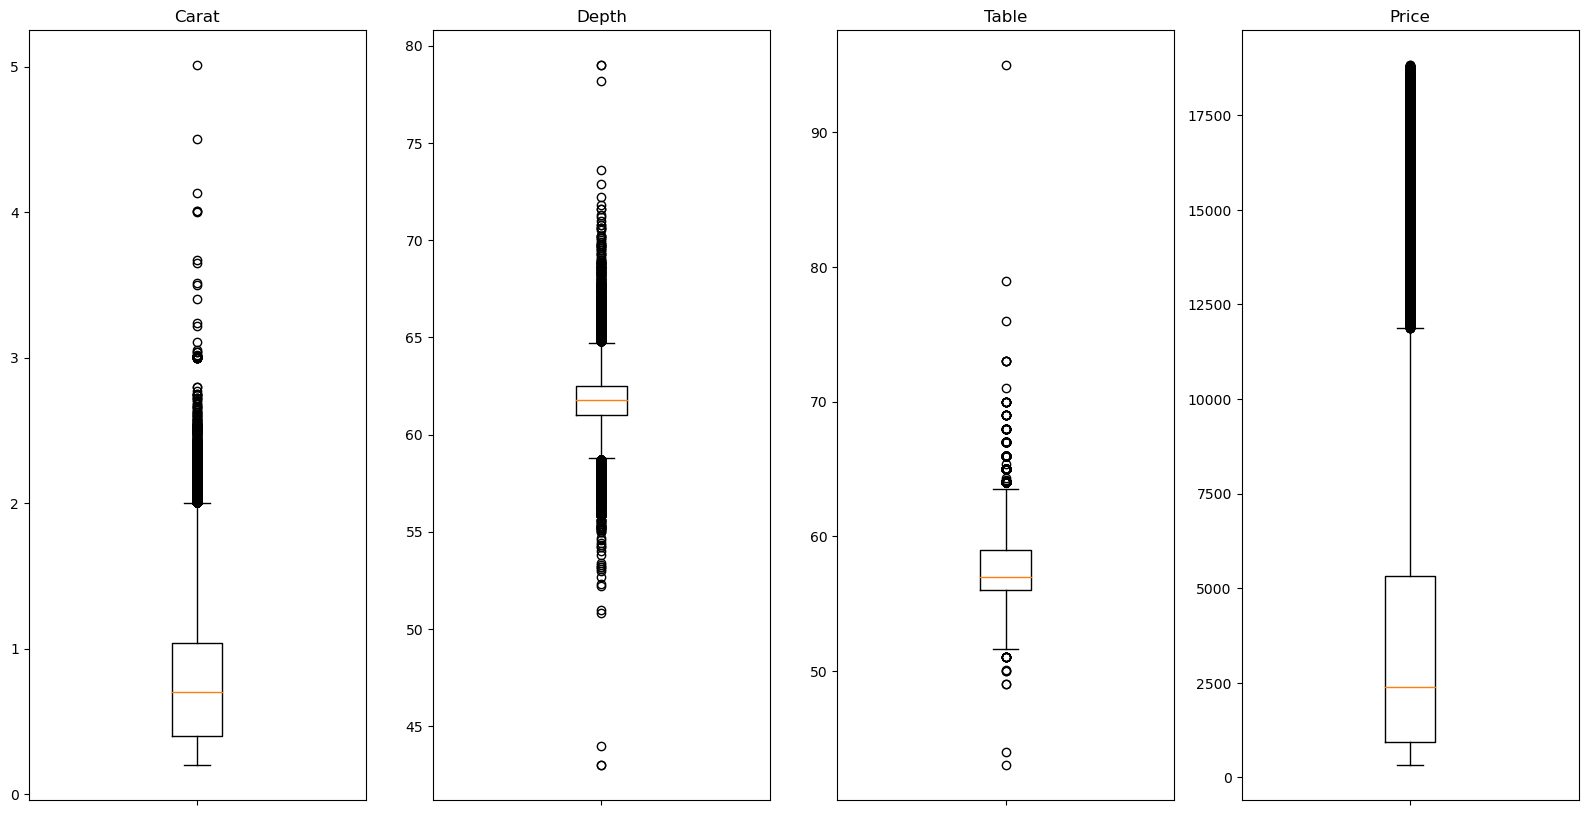

In [6]:
#box plots for numerical data:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(data['x'])
axs[0].set_title('X')
axs[0].set_xticklabels([])

axs[1].boxplot(data['y'])
axs[1].set_title('Y')
axs[1].set_xticklabels([])

axs[2].boxplot(data['z'])
axs[2].set_title('Z')
axs[2].set_xticklabels([])
plt.savefig('boxplot_xyz.png')
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].boxplot(data['carat'])
axs[0].set_title('Carat')
axs[0].set_xticklabels([])

axs[1].boxplot(data['depth'])
axs[1].set_title('Depth')
axs[1].set_xticklabels([])

axs[2].boxplot(data['table'])
axs[2].set_title('Table')
axs[2].set_xticklabels([])

axs[3].boxplot(data['price'])
axs[3].set_title('Price')
axs[3].set_xticklabels([])
plt.savefig('boxplot_other.png')
plt.show()

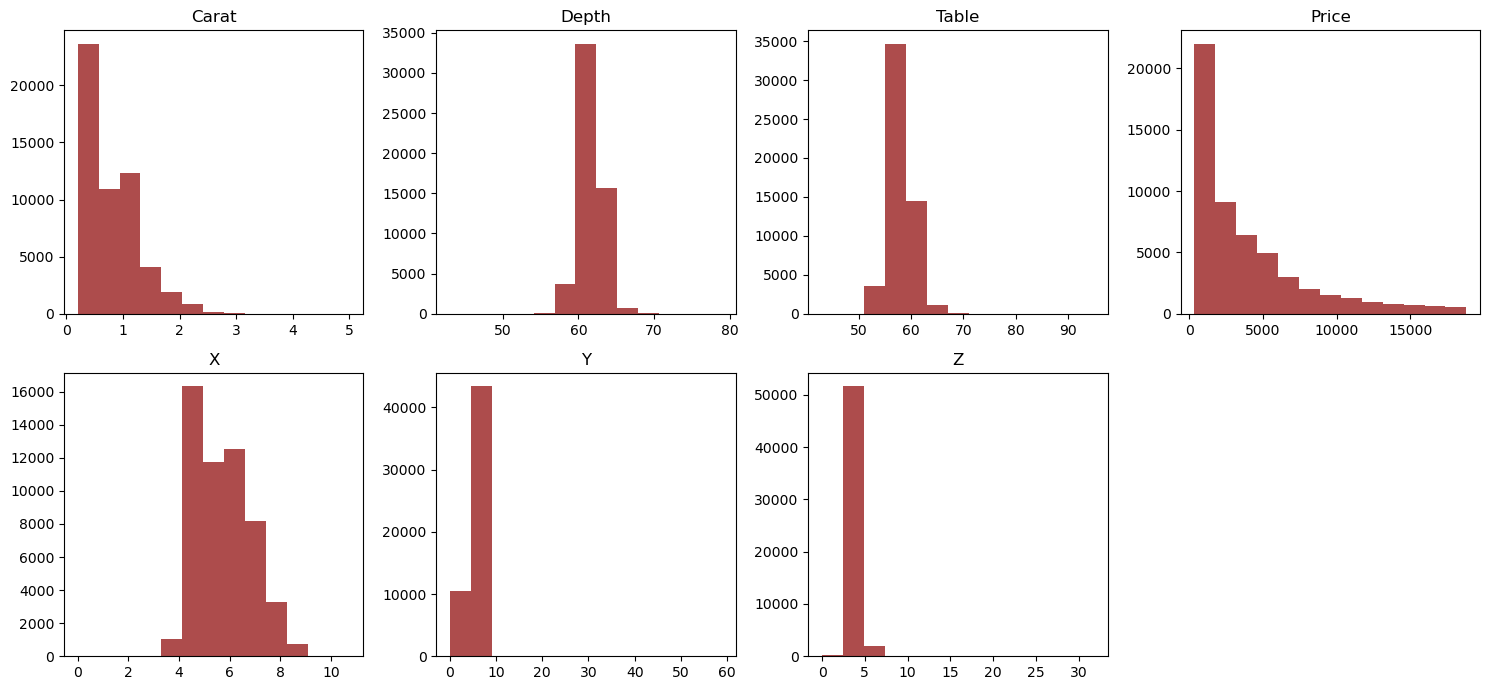

Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


In [7]:
#histograms of numerical data

selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df = pd.DataFrame({col: data[col] for col in selected_columns})
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 7))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    ax = axs[i]
    ax.hist(df[column], bins=13, color='darkred', alpha=0.7)
    ax.set_title(column.capitalize())  # Set the title to the column name
for ax in axs[len(df.columns):]:
    ax.axis('off')
plt.tight_layout()
plt.savefig('hist_overview.png')
plt.show()

#normality test
attributes = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
alpha = 0.05
for attribute in attributes:
    statistic, p_value = normaltest(data[attribute])

    if p_value > alpha:
        print(f"{attribute.capitalize()}: fail to reject H0")
    else:
        print(f"{attribute.capitalize()}: reject H0")

In [8]:
#correlation matrix
cormat = data.corr(numeric_only = True)
round(cormat,2)


#numerical values of 'price' are transformed into 'price_category', which takes values from 0 to 10
num_categories = 10
max_price = data['price'].max()
custom_bin_edges = np.linspace(0, max_price, num=num_categories + 1)
custom_bin_edges = np.unique(custom_bin_edges)
custom_bin_edges[-1] = np.inf
labels = range(len(custom_bin_edges) - 1)
data['price_category'] = pd.cut(data['price'], bins=custom_bin_edges, labels=labels, include_lowest=True)


#Dictionary of the price classes and price intervals
classLabels = data['price_category']
classNames=[]
classDict = {}
C=0
for category, interval in enumerate(pd.cut(data['price'], bins=custom_bin_edges).unique()):
    interval_value = str(interval)
    interval_value = interval_value.replace('(', '').replace('[', '').replace(',', ' -').replace(']', '').replace(')', '')  # Remove parentheses and brackets
    classDict[interval_value]=category
    classNames.append(interval_value)
    C=C+1

y = np.asarray(classLabels)

#Creating X data matrix
x_attributes = [0,1,2,3,4,5,7,8,9]
X = data.iloc[:, x_attributes].values
attributeNames = data.columns[x_attributes].tolist()

In [9]:
#Encoding non-numerical ordinal data into integers: 'cut' attribute
cut_values = X[:, 1]
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
mapping_func = np.vectorize(lambda x: cut_mapping[x])

# Convert ordinal values to numerical values
cut_values = X[:, 1]
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
mapping_func = np.vectorize(lambda x: cut_mapping[x])
cut_numerical = mapping_func(cut_values)
X[:, 1] = cut_numerical

#Encoding non-numerical ordinal data into integers: 'clarity' attribute
clarity_values = X[:,3]
clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7,
}
mapping_func = np.vectorize(lambda x: clarity_mapping[x])
clarity_numerical = mapping_func(clarity_values)
X[:, 3] = clarity_numerical

#Encoding non-numerical ordinal data into integers: 'color' attribute
color_values = X[:,2]
color_mapping = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6,
}
mapping_func = np.vectorize(lambda x: color_mapping[x])
color_numerical = mapping_func(color_values)
X[:, 2] = color_numerical

#Dimension of X matrix
N,M = X.shape

#Assigning float type to all matrix entries
X = X.astype(float)

#perform singular valio docompoition and create varience plot
X_mean = np.mean(X, axis=0)

X_std = np.std(X, axis=0)

Y = (X - X_mean)/X_std

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

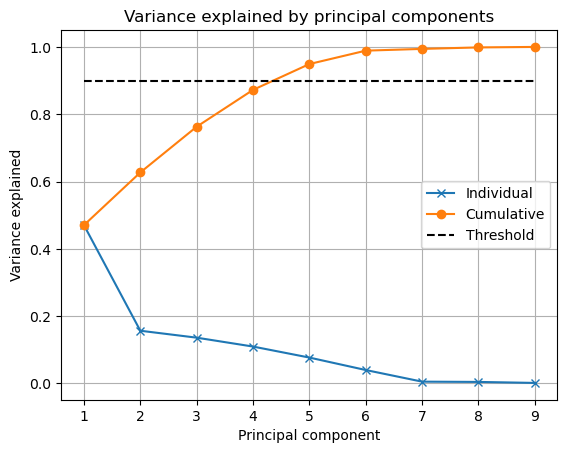

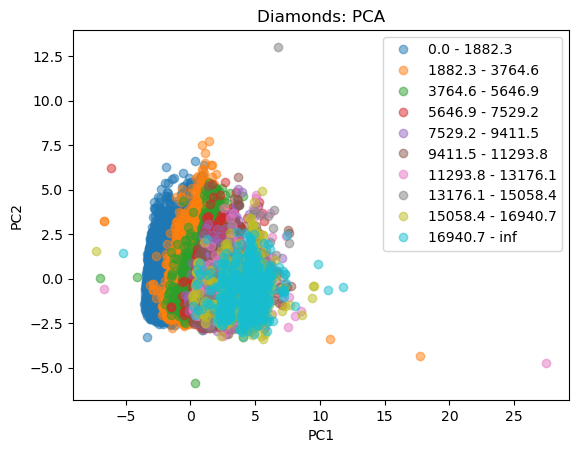

In [10]:
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()

plt.xticks(range(1, len(rho) + 1), [i for i in range(1, len(rho) + 1)])
plt.savefig('varience_explained.png')
plt.show()

#output rho(varience explained)
sum(rho[0:2])

#data projection on pc1 and pc2
V = Vh.T
Z = Y @ V
i = 0
j = 1
f = figure()
title("Diamonds: PCA")
for c in range(C):
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))
plt.savefig('pca1_2.png')
show()

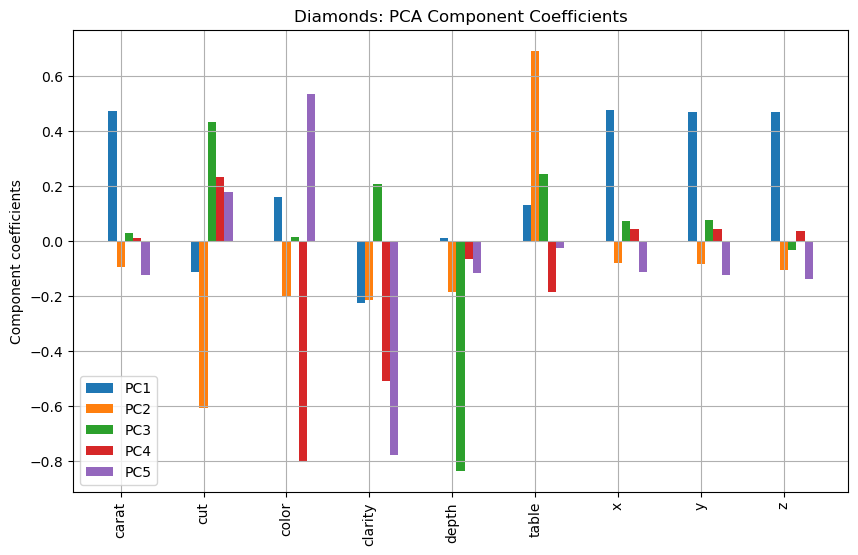

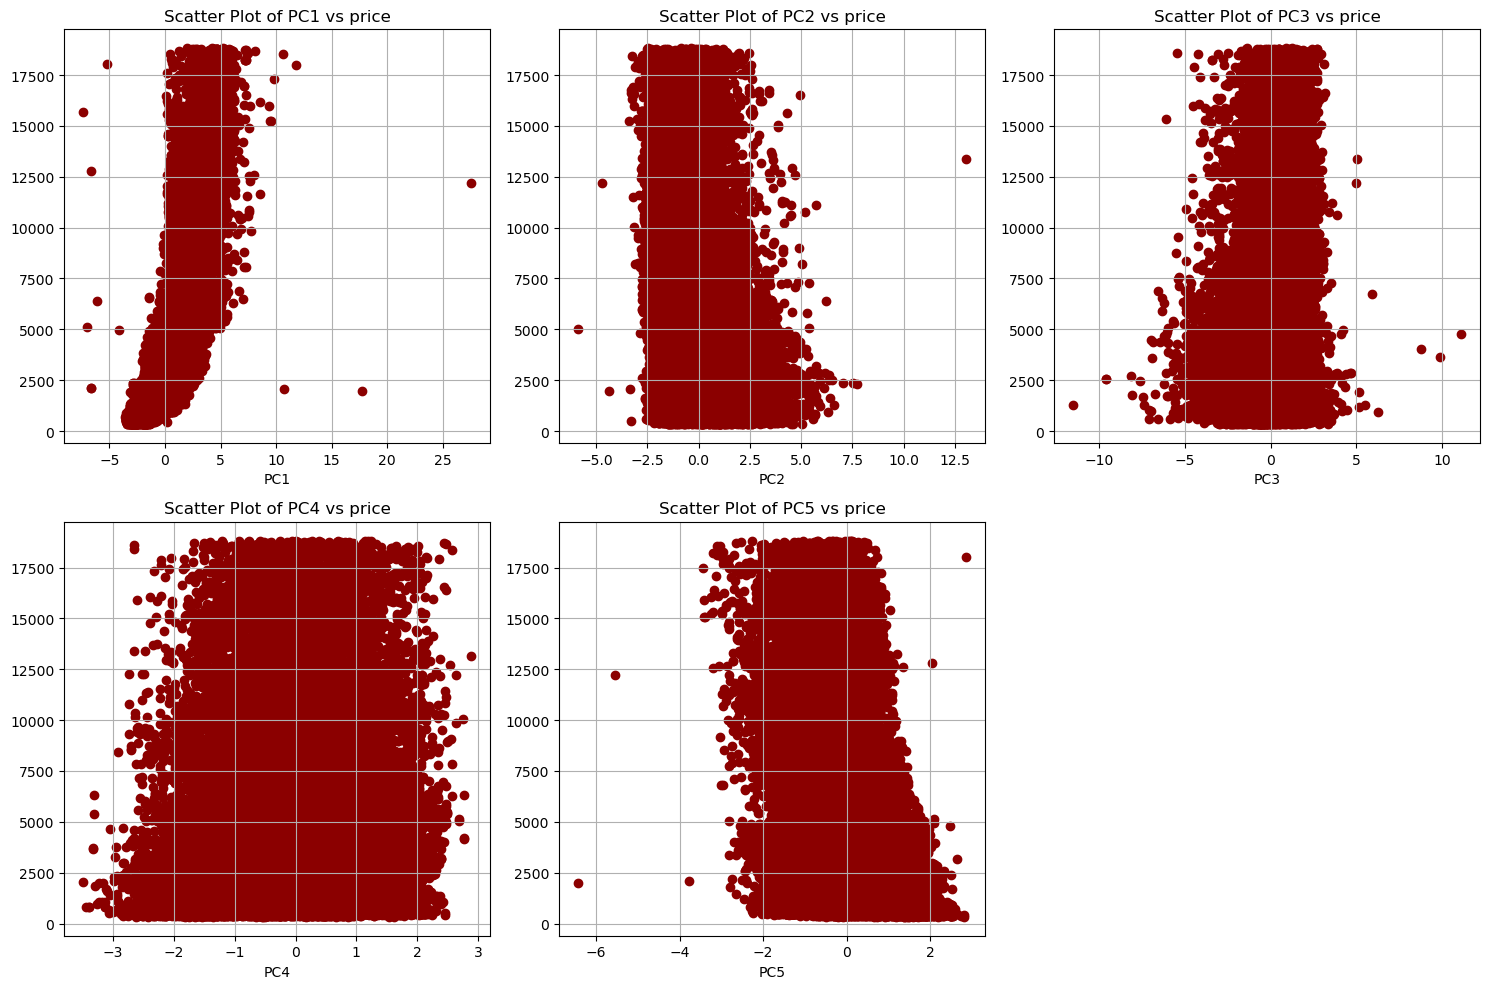

In [11]:
#Vector coefficient plotted for PC1-PC5
pcs = [0, 1, 2,3,4]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.1
r = np.arange(1, M + 1)
plt.figure(figsize=(10, 6))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames, rotation='vertical')
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Diamonds: PCA Component Coefficients")
plt.savefig('PCAComponentCoef.png')
plt.show()

#eigenvector matrix for PC1-PC5
V_matrix = np.round(V[:, :5], decimals=2)

#S matrix for PC1-PC5
S_matrix = np.round(S[:5], decimals=2)


#plots of price against each of PC1-PC5
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
PC_values = [np.dot(Y, V[:, i]) for i in range(5)]  # Compute PC values for all 5 principal components
y_values=data['price']
for i in range(2):
    for j in range(3):
        idx = i * 3 + j
        if idx < 5:
            axs[i, j].scatter(PC_values[idx], y_values, color='darkred')
            axs[i, j].set_xlabel('PC{}'.format(idx + 1))
            axs[i, j].set_title('Scatter Plot of PC{} vs price'.format(idx + 1))
            axs[i, j].grid(True)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('PCAsvsY.png')
plt.show()

In [12]:
#REGRESSION PART A (1)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data cleaning
#data.replace({'?': np.nan}, inplace=True)

#data.dropna(inplace=True)

# Select features and target variable
y = data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column transformer for one-hot encoding categorical features
#categorical_cols = ['cut', 'color', 'clarity']
#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('onehot', OneHotEncoder(), categorical_cols)
  #  ],
  #  remainder='passthrough'
#)

# Preprocess the training data
#X_train_preprocessed = preprocessor.fit_transform(X_train)
#X_test_preprocessed = preprocessor.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train RMSE: 1214.5743570244688
Test RMSE: 1224.5965418579667
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073493


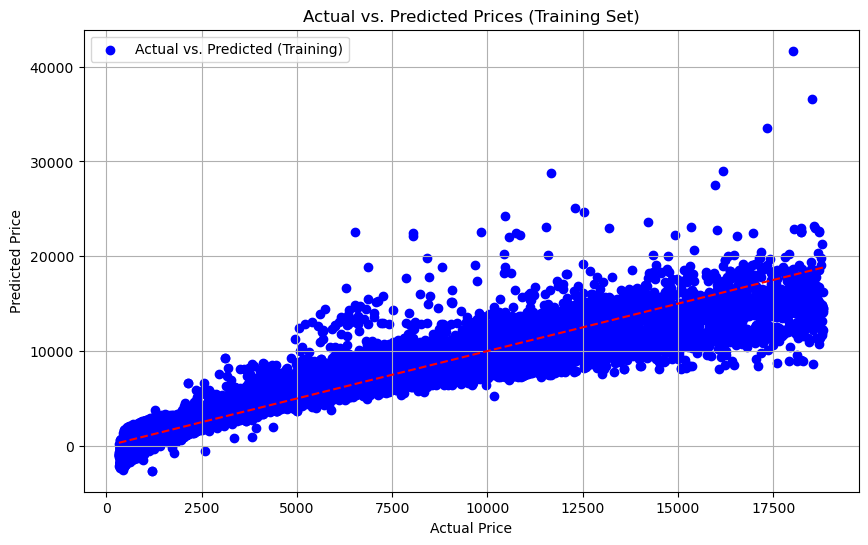

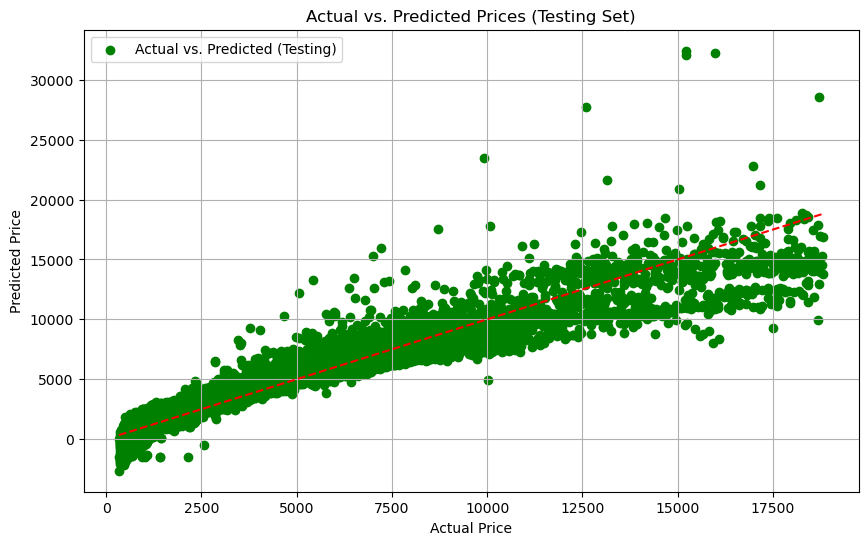

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum([(abs(y_pred - y_true)) for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(abs(y_pred - y_true)) for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10)

lambda_values = [0, 0.00001, 0.1 , 1,10,20,30,100]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

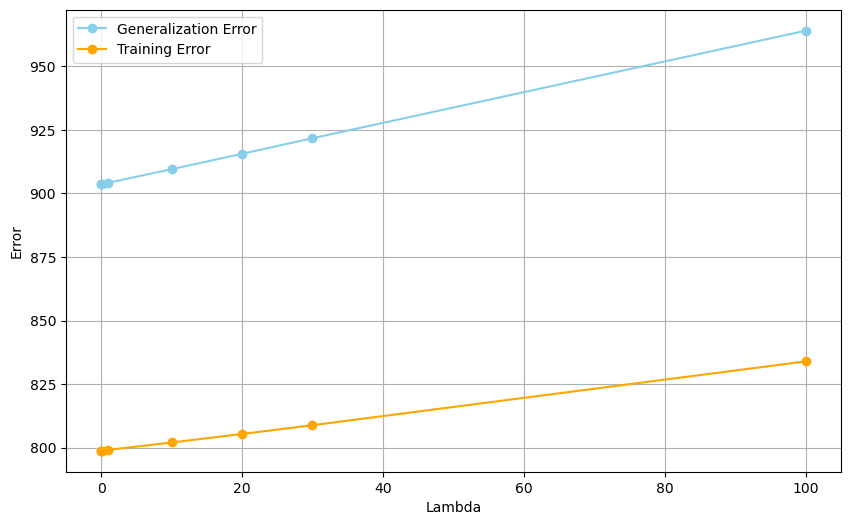

In [20]:
lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#REGRESSION PART B (1)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [1, 5, 10, 20]  # Example range for the number of hidden units in the ANN
lambda_values = [0.001, 0.01, 0.1, 1, 10]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the performance of each model
baseline_scores = []
ridge_scores = []
ann_scores = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
        
        # Train ANN models with different numbers of hidden units on the inner training set
        for h in h_values:
            # Adjusted ANN model with specified parameters
            ann_model = MLPRegressor(
                hidden_layer_sizes=(h,),
                max_iter=1000,  # Increase the number of iterations
                learning_rate_init=0.001,  # Adjust the learning rate
                solver='adam',  # Try different solvers
                early_stopping=True,  # Enable early stopping
                random_state=42
            )
            ann_model.fit(X_inner_train_scaled, y_inner_train)
            y_ann_pred = ann_model.predict(X_inner_val_scaled)
            ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_scores.append(mean_squared_error(y_outer_test, y_baseline_pred))
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_scores.append(mean_squared_error(y_outer_test, y_ridge_pred))
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_scores.append(mean_squared_error(y_outer_test, y_ann_pred))

# Calculate the average performance across all outer folds
avg_baseline_score = np.mean(baseline_scores)
avg_ridge_score = np.mean(ridge_scores)
avg_ann_score = np.mean(ann_scores)

# Compare the models
print("Baseline Model Average MSE:", avg_baseline_score)
print("Regularized Linear Regression Average MSE:", avg_ridge_score)
print("Artificial Neural Network Average MSE:", avg_ann_score)


Baseline Model Average MSE: 15916386.683994746
Regularized Linear Regression Average MSE: 1483613.4607027385
Artificial Neural Network Average MSE: 772116.6648143549


In [29]:
#REGRESSION PART B (2)

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [3, 4]  # Example range for the number of hidden units in the ANN
lambda_values = [0.01, 0.05]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the results for each outer fold
results = []

# Outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
            
            # Train ANN models with different numbers of hidden units on the inner training set
for h in h_values:
    ann_model = MLPRegressor(
        hidden_layer_sizes=(h,),
        max_iter=2000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42,
        verbose=True  # Enable verbose mode to monitor convergence
    )
    ann_model.fit(X_inner_train_scaled, y_inner_train)  # Training the model

    # Check if the optimization converged
    if not ann_model.n_iter_ == 2000:
        print("Warning: The optimization may not have converged.")

    y_ann_pred = ann_model.predict(X_inner_val_scaled)
    ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_test_error = mean_squared_error(y_outer_test, y_baseline_pred)
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_test_error = mean_squared_error(y_outer_test, y_ridge_pred)
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_test_error = mean_squared_error(y_outer_test, y_ann_pred)
    
    # Store the results for this fold
    results.append({
        'Fold': i + 1,
        'Optimal h': best_h,
        'ANN Test Error': ann_test_error,
        'Optimal λ': best_lambda,
        'Ridge Test Error': ridge_test_error,
        'Baseline Test Error': baseline_test_error
    })

# Convert the results to a pandas DataFrame for easy table creation
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

Iteration 1, loss = 15568425.96280628
Validation score: -0.989561
Iteration 2, loss = 15563383.95561119
Validation score: -0.988704
Iteration 3, loss = 15554438.07957277
Validation score: -0.987251
Iteration 4, loss = 15541095.98348587
Validation score: -0.985280
Iteration 5, loss = 15523919.30790785
Validation score: -0.982842
Iteration 6, loss = 15503164.85988335
Validation score: -0.979964
Iteration 7, loss = 15479148.75453664
Validation score: -0.976684
Iteration 8, loss = 15452134.24081721
Validation score: -0.973037
Iteration 9, loss = 15422237.00796021
Validation score: -0.969028
Iteration 10, loss = 15389628.98003523
Validation score: -0.964683
Iteration 11, loss = 15354525.83045110
Validation score: -0.960025
Iteration 12, loss = 15317075.37163886
Validation score: -0.955075
Iteration 13, loss = 15277327.44861003
Validation score: -0.949828
Iteration 14, loss = 15235309.69353645
Validation score: -0.944308
Iteration 15, loss = 15191201.96788388
Validation score: -0.938535
Iter

Iteration 129, loss = 4758564.23050786
Validation score: 0.402227
Iteration 130, loss = 4680124.51017383
Validation score: 0.412238
Iteration 131, loss = 4602619.25473662
Validation score: 0.422123
Iteration 132, loss = 4526092.94300128
Validation score: 0.431863
Iteration 133, loss = 4450516.16879547
Validation score: 0.441516
Iteration 134, loss = 4375870.53664775
Validation score: 0.451006
Iteration 135, loss = 4302147.10100891
Validation score: 0.460386
Iteration 136, loss = 4229450.90073855
Validation score: 0.469664
Iteration 137, loss = 4157739.44283682
Validation score: 0.478775
Iteration 138, loss = 4086924.67239315
Validation score: 0.487808
Iteration 139, loss = 4017096.14645251
Validation score: 0.496710
Iteration 140, loss = 3948418.53218572
Validation score: 0.505445
Iteration 141, loss = 3880781.14070785
Validation score: 0.514048
Iteration 142, loss = 3814128.18627984
Validation score: 0.522555
Iteration 143, loss = 3748405.77979462
Validation score: 0.530887
Iteration 

Iteration 256, loss = 1295339.30723423
Validation score: 0.837503
Iteration 257, loss = 1287780.05771727
Validation score: 0.838431
Iteration 258, loss = 1280262.52169257
Validation score: 0.839352
Iteration 259, loss = 1272789.39953978
Validation score: 0.840270
Iteration 260, loss = 1265345.84753616
Validation score: 0.841181
Iteration 261, loss = 1257965.77320045
Validation score: 0.842094
Iteration 262, loss = 1250603.60079869
Validation score: 0.843001
Iteration 263, loss = 1243284.27420673
Validation score: 0.843907
Iteration 264, loss = 1236010.51850153
Validation score: 0.844805
Iteration 265, loss = 1228789.75681264
Validation score: 0.845702
Iteration 266, loss = 1221591.35585259
Validation score: 0.846595
Iteration 267, loss = 1214393.48876326
Validation score: 0.847484
Iteration 268, loss = 1207212.04313210
Validation score: 0.848365
Iteration 269, loss = 1200087.67160122
Validation score: 0.849239
Iteration 270, loss = 1193013.99150393
Validation score: 0.850120
Iteration 

Iteration 392, loss = 734029.17402873
Validation score: 0.903966
Iteration 393, loss = 733218.16668242
Validation score: 0.904054
Iteration 394, loss = 732455.85329148
Validation score: 0.904128
Iteration 395, loss = 731697.80167164
Validation score: 0.904201
Iteration 396, loss = 730956.63147439
Validation score: 0.904270
Iteration 397, loss = 730256.15511094
Validation score: 0.904338
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15494283.79087150
Validation score: -0.958267
Iteration 2, loss = 15480983.47813996
Validation score: -0.956225
Iteration 3, loss = 15461009.52248012
Validation score: -0.953286
Iteration 4, loss = 15433721.74774376
Validation score: -0.949447
Iteration 5, loss = 15399279.95343675
Validation score: -0.944735
Iteration 6, loss = 15358070.83910948
Validation score: -0.939204
Iteration 7, loss = 15310626.60719078
Validation score: -0.932942
Iteration 8, loss = 15257351.91386604
Validation score:

Iteration 125, loss = 2217823.90571882
Validation score: 0.717316
Iteration 126, loss = 2184176.68644662
Validation score: 0.721861
Iteration 127, loss = 2152117.54789016
Validation score: 0.726257
Iteration 128, loss = 2121477.47289622
Validation score: 0.730469
Iteration 129, loss = 2092056.22768175
Validation score: 0.734507
Iteration 130, loss = 2063923.05508558
Validation score: 0.738393
Iteration 131, loss = 2036921.37582773
Validation score: 0.742100
Iteration 132, loss = 2010985.46148287
Validation score: 0.745680
Iteration 133, loss = 1986064.64133309
Validation score: 0.749143
Iteration 134, loss = 1962061.43601573
Validation score: 0.752461
Iteration 135, loss = 1938841.46974147
Validation score: 0.755715
Iteration 136, loss = 1916308.57169102
Validation score: 0.758838
Iteration 137, loss = 1894567.46254756
Validation score: 0.761871
Iteration 138, loss = 1873428.40812638
Validation score: 0.764812
Iteration 139, loss = 1852762.90765605
Validation score: 0.767686
Iteration 

Iteration 254, loss = 759707.61711925
Validation score: 0.918395
Iteration 255, loss = 757380.55352569
Validation score: 0.918694
Iteration 256, loss = 755103.81542597
Validation score: 0.918969
Iteration 257, loss = 752870.44921622
Validation score: 0.919245
Iteration 258, loss = 750741.27978543
Validation score: 0.919519
Iteration 259, loss = 748651.77466088
Validation score: 0.919779
Iteration 260, loss = 746606.90561608
Validation score: 0.920042
Iteration 261, loss = 744628.17928678
Validation score: 0.920279
Iteration 262, loss = 742682.61175161
Validation score: 0.920517
Iteration 263, loss = 740795.67398825
Validation score: 0.920746
Iteration 264, loss = 738932.02216366
Validation score: 0.920975
Iteration 265, loss = 737082.90020469
Validation score: 0.921192
Iteration 266, loss = 735313.29379328
Validation score: 0.921415
Iteration 267, loss = 733540.23908704
Validation score: 0.921614
Iteration 268, loss = 731835.71983785
Validation score: 0.921811
Iteration 269, loss = 730